# Fast & Cheap
Le projet d'analyse de données et de régression linéaire afin d'aider *Martin* à estimer sa future voiture en fonction des caractéristiques souhaitées :
- Véhicule moins de 7 ans
- Pas plus de 100 000km au compteur
- En boîte manuelle

## Récupération des données et nettoyage du dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
# Chargement des données et analyses générales
df = pd.read_csv('data/raw/carData.csv', encoding='latin-1')
print("5 premières lignes du dataset")
print(df.head())
print('----------------------------------------------------------------')
print("Analyse descriptive des variables numérique")
print(df.describe())
print('----------------------------------------------------------------')
print("Infos générales (types de variables, nombre des lignes etc...)")
print(df.info())


5 premières lignes du dataset
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
----------------------------------------------------------------
Analyse descriptive des variables numérique
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205

## Nettoyage du dataset

In [15]:
# Suppresion des lignes doublés
df = df.drop_duplicates()

# Nombre de lignes doublées supprimées
print('\nAprès suppression lignes doublées :')
print(df.info())

print('----------------------------------------------------------------')

# Vérification de valeurs manquantes
print("\nVérification de valeurs manquantes :")
print(df.isnull().sum())

print("\nComme il n'y a pas de valeurs manquantes, aucune suppression de lignes")


Après suppression lignes doublées :
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB
None
----------------------------------------------------------------

Vérification de valeurs manquantes :
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Comme il n'y a pas de va

## Sauvegarde du dataset propre

In [16]:
# Sauvegarder le tableau nettoyé dans data/clean
os.makedirs('data/clean', exist_ok=True)

# Copier le DataFrame actuel (après nettoyage/transformations)
df_clean = df.copy()

# Chemin de sortie
path_wide = 'data/clean/carData_clean.csv'

# Enregistrer les fichiers
try:
    df_clean.to_csv(path_wide, index=False)
    print(f"Sauvegardé : {path_wide} (shape={df_clean.shape})")
except Exception as e:
    print('Erreur lors de la sauvegarde :', e)

Sauvegardé : data/clean/carData_clean.csv (shape=(299, 9))


## Traçage de distribution des données en histogramme

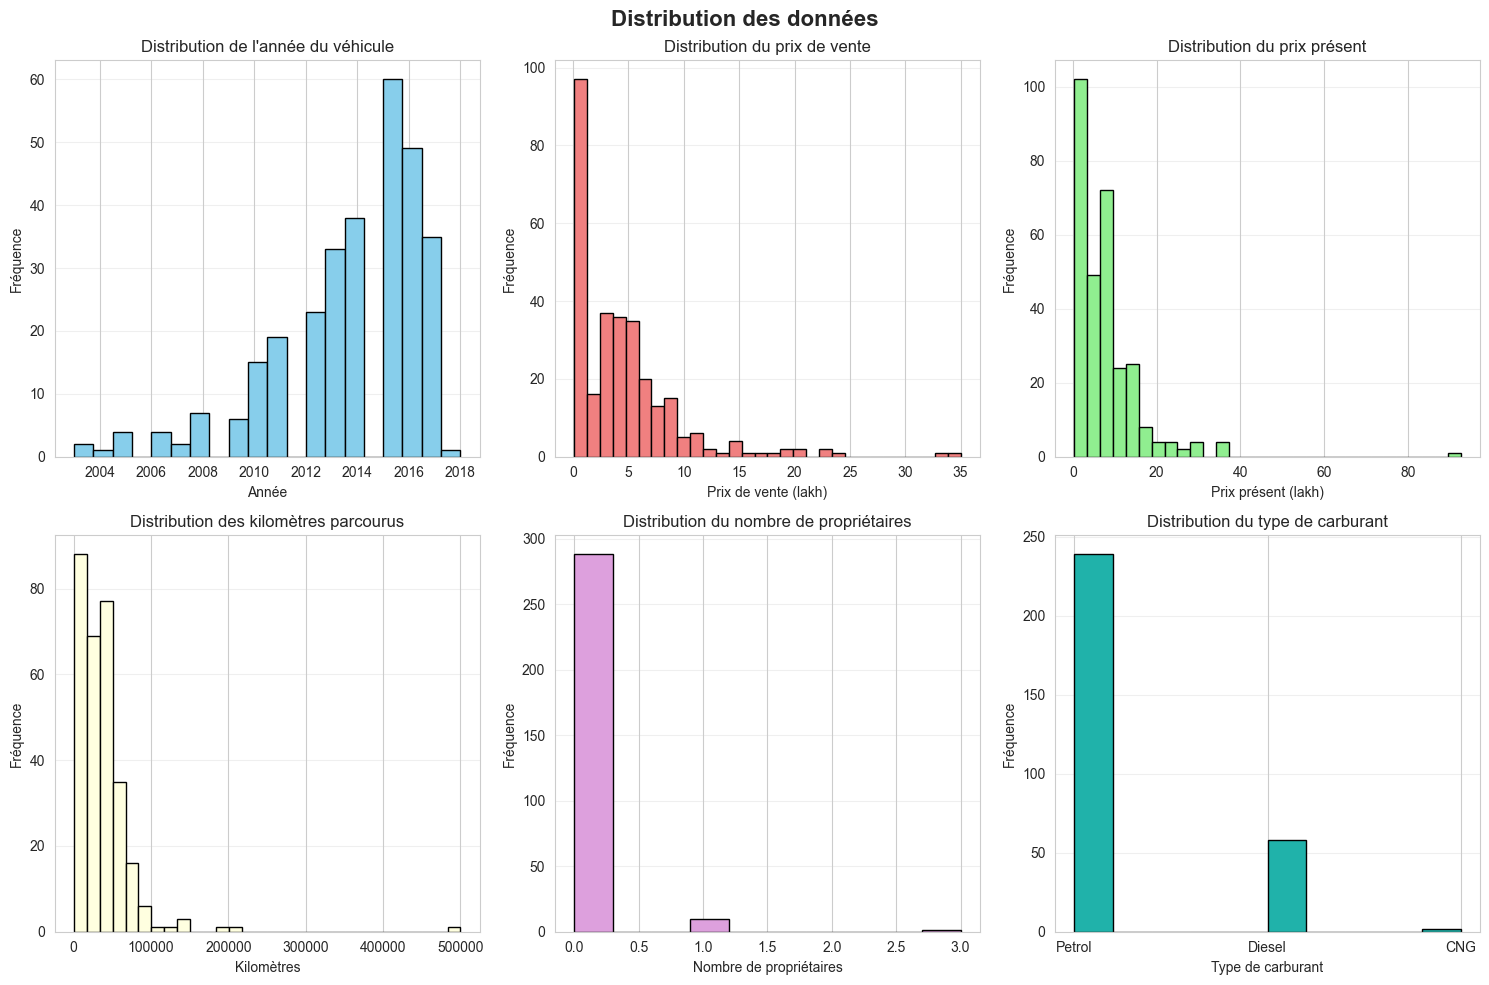

In [17]:
# Charger les données nettoyées
df_clean = pd.read_csv('data/clean/carData_clean.csv')

# Créer une figure avec plusieurs emplacements pour les histogrammes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution des données', fontsize=16, fontweight='bold')

# Histogramme 1: Année du véhicule
axes[0, 0].hist(df_clean['Year'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution de l\'année du véhicule')
axes[0, 0].set_xlabel('Année')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(axis='y', alpha=0.3)

# Histogramme 2: Prix de vente
axes[0, 1].hist(df_clean['Selling_Price'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution du prix de vente')
axes[0, 1].set_xlabel('Prix de vente (lakh)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].grid(axis='y', alpha=0.3)

# Histogramme 3: Prix présent (usine)
axes[0, 2].hist(df_clean['Present_Price'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Distribution du prix présent')
axes[0, 2].set_xlabel('Prix présent (lakh)')
axes[0, 2].set_ylabel('Fréquence')
axes[0, 2].grid(axis='y', alpha=0.3)

# Histogramme 4: Kilomètres parcourus
axes[1, 0].hist(df_clean['Kms_Driven'], bins=30, color='lightyellow', edgecolor='black')
axes[1, 0].set_title('Distribution des kilomètres parcourus')
axes[1, 0].set_xlabel('Kilomètres')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].grid(axis='y', alpha=0.3)

# Histogramme 5: Nombre de propriétaires
axes[1, 1].hist(df_clean['Owner'], bins=10, color='plum', edgecolor='black')
axes[1, 1].set_title('Distribution du nombre de propriétaires')
axes[1, 1].set_xlabel('Nombre de propriétaires')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].grid(axis='y', alpha=0.3)

# Histogramme 6: Type de carburant
axes[1, 2].hist(df_clean['Fuel_Type'], bins=10, color='lightseagreen', edgecolor='black')
axes[1, 2].set_title('Distribution du type de carburant')
axes[1, 2].set_xlabel('Type de carburant')
axes[1, 2].set_ylabel('Fréquence')
axes[1, 2].grid(axis='y', alpha=0.3)

# Ajuster l'espacementdes sous-graphiques
plt.tight_layout()
plt.show()

## Visualisation en Seaborn Catplot

Ce type de visuel est utile afin de visualiser les relations entre les variables catégorielles et les variables numériques.
Dans notre cas, nous souhaitons explorer comment le prix de vente (`Selling_Price`) et le prix actuel (`Present_Price`) varient en fonction de caractéristiques catégorielles du véhicule : le type de carburant (`Fuel_Type`), le type de vendeur (`Seller_Type`), la transmission (`Transmission`) et le nombre de propriétaires (`Owner`).

En traçant plusieurs `catplot`, nous serons à même de repérer des tendances ou des disparités entre catégories, par exemple si les voitures diesel se vendent plus cher que les voitures essence, ou si la transmission automatique influe sur le prix.

<Figure size 800x600 with 0 Axes>

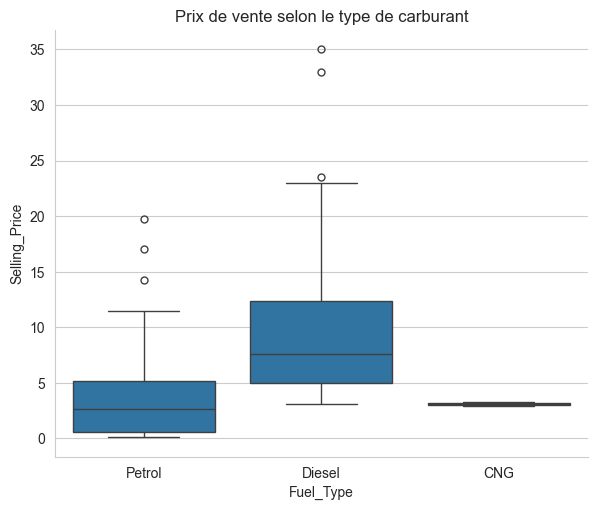

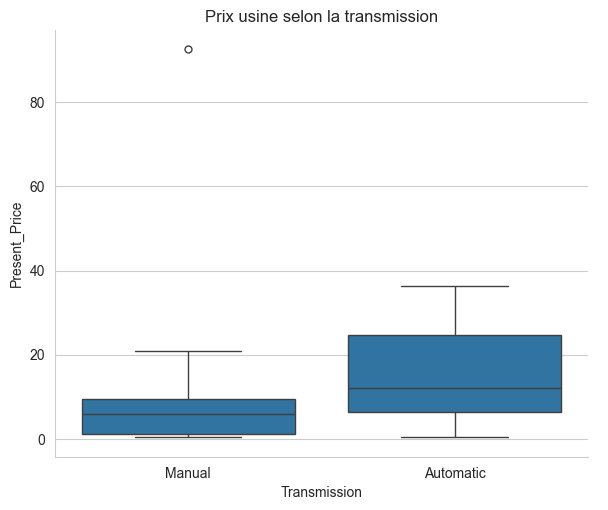

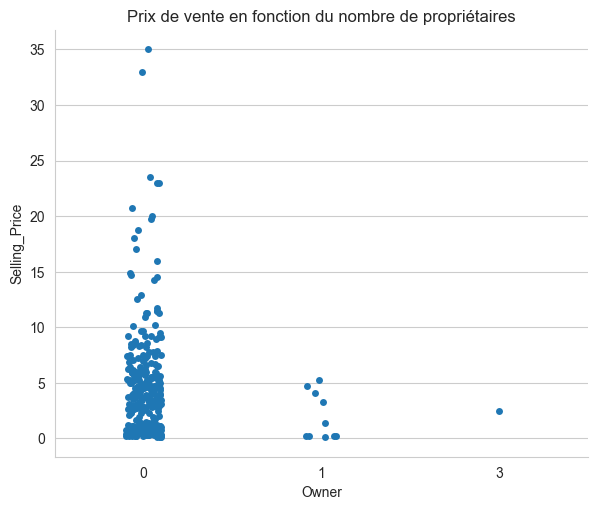

In [18]:
# Catplot 1 : prix de vente par type de carburant
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.catplot(x='Fuel_Type', y='Selling_Price', kind='box', data=df_clean, height=5, aspect=1.2)
plt.title('Prix de vente selon le type de carburant')
plt.show()

# Catplot 2 : prix actuel par transmission
sns.catplot(x='Transmission', y='Present_Price', kind='box', data=df_clean, height=5, aspect=1.2)
plt.title('Prix usine selon la transmission')
plt.show()

# Catplot 3 : prix de vente versus nombre de propriétaires
sns.catplot(x='Owner', y='Selling_Price', kind='strip', jitter=True, data=df_clean, height=5, aspect=1.2)
plt.title('Prix de vente en fonction du nombre de propriétaires')
plt.show()

# On peut enchaîner d'autres relations de la même façon si besoin.

## Quantifier la relation âge et prix, régression linéaire & corrélation

Pour établir si une régression linéaire est pertinente, il faut :
1. calculer l'âge du véhicule (`2019 - Year` par exemple),
2. mesurer la corrélation de Pearson entre l'âge et le prix de vente ;
3. vérifier la distribution des points (nuage de dispersion) pour voir si
des tendances linéaires apparaissent.

Une corrélation proche de -1 ou +1 suggère une relation linéaire forte. Si
toutefois le nuage de points est très dispersé ou non aligné, un modèle
linéaire simple ne conviendrait pas bien à nos données et il faudrait
envisager d'autres algorithmes.

Corrélation de Pearson (âge vs prix de vente) : -0.2344


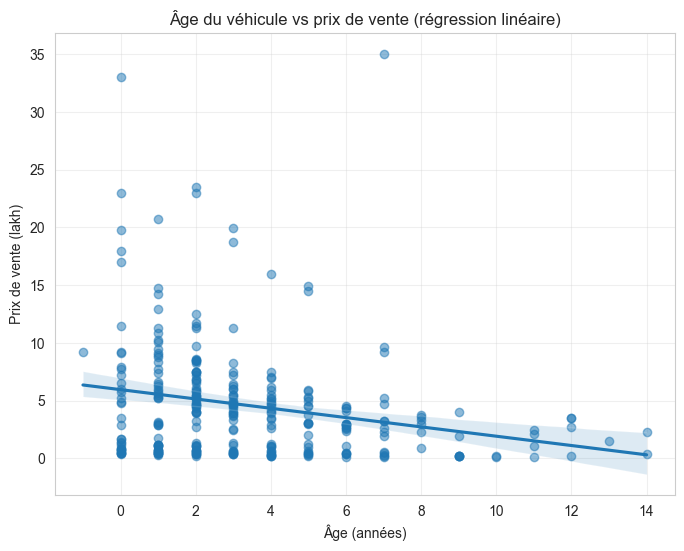

La corrélation est faible : les données ne semblent pas bien exploitables par un modèle linéaire simple.


In [19]:
# calculer l'âge du véhicule (année courante supposée 2017 ici)
df_clean['Age'] = 2017 - df_clean['Year']

# corrélation de Pearson
corr_age_price = df_clean[['Age','Selling_Price']].corr().loc['Age','Selling_Price']
print(f"Corrélation de Pearson (âge vs prix de vente) : {corr_age_price:.4f}")

# nuage de points et droite de régression
plt.figure(figsize=(8,6))
sns.regplot(x='Age', y='Selling_Price', data=df_clean, scatter_kws={'alpha':0.5})
plt.title('Âge du véhicule vs prix de vente (régression linéaire)')
plt.xlabel('Âge (années)')
plt.ylabel('Prix de vente (lakh)')
plt.grid(alpha=0.3)
plt.show()

# commentaire sur l'adéquation
if abs(corr_age_price) < 0.3:
    print("La corrélation est faible : les données ne semblent pas bien exploitables par un modèle linéaire simple.")
else:
    print("La corrélation est modérée à forte, une régression linéaire peut être envisagée comme première approche.")

## A) Régression linéaire univariée

Scipy linregress:
 slope = -0.4032, intercept = 5.9545
 r = -0.2344, r^2 = 0.0549
 p-value = 4.2620e-05, stderr = 0.0971


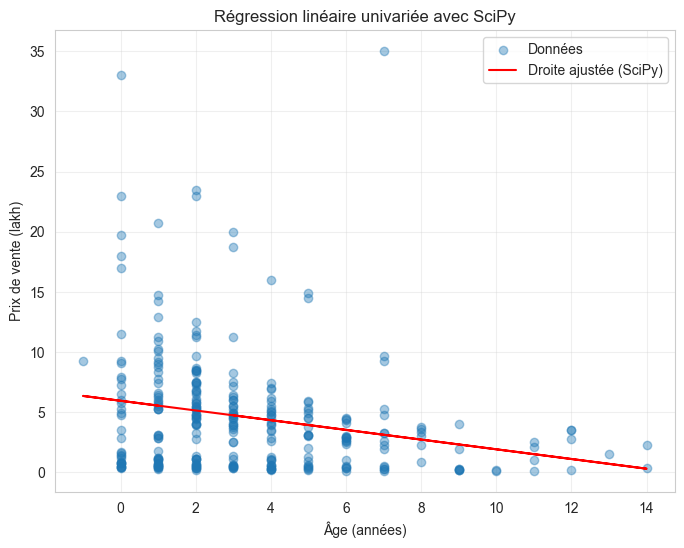


Scikit-learn LinearRegression:
 coefficient (coef_) = -0.4032
 intercept (intercept_) = 5.9545
 r² score (sur les données d'entraînement) = 0.0549
Prédictions pour Âge=5,10,15 : [ 3.93823311  1.9219981  -0.0942369 ]


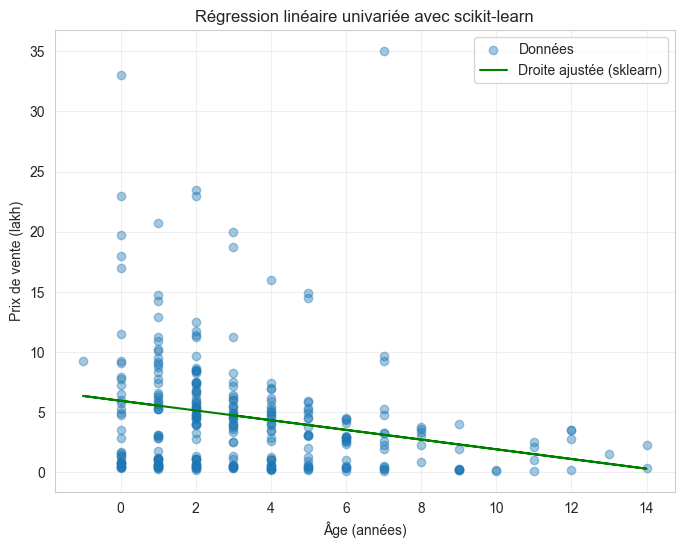

In [20]:
# Configuration des données
X = df_clean[["Age"]].values.reshape(-1, 1)  # matrice (n_samples, 1)
y = df_clean["Selling_Price"].values        # vecteur (n_samples,)

# -------------------
# 1. Méthode SciPy
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_clean['Age'], df_clean['Selling_Price']
)
print("Scipy linregress:")
print(f" slope = {slope:.4f}, intercept = {intercept:.4f}")
print(f" r = {r_value:.4f}, r^2 = {r_value**2:.4f}")
print(f" p-value = {p_value:.4e}, stderr = {std_err:.4f}")

# Visualisation de la droite de régression SciPy
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Age'], df_clean['Selling_Price'], alpha=0.4, label='Données')
plt.plot(df_clean['Age'], intercept + slope * df_clean['Age'], 'r', label='Droite ajustée (SciPy)')
plt.xlabel('Âge (années)')
plt.ylabel('Prix de vente (lakh)')
plt.title('Régression linéaire univariée avec SciPy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -------------------
# 2. Méthode scikit-learn
model = LinearRegression()
model.fit(X, y)
print("\nScikit-learn LinearRegression:")
print(f" coefficient (coef_) = {model.coef_[0]:.4f}")
print(f" intercept (intercept_) = {model.intercept_:.4f}")
print(f" r² score (sur les données d'entraînement) = {model.score(X, y):.4f}")

# quelques prédictions
ages_test = np.array([[5], [10], [15]])
print("Prédictions pour Âge=5,10,15 :", model.predict(ages_test))

# Visualisation de la droite de régression scikit-learn
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Age'], df_clean['Selling_Price'], alpha=0.4, label='Données')
plt.plot(df_clean['Age'], y_pred, color='green', label='Droite ajustée (sklearn)')
plt.xlabel('Âge (années)')
plt.ylabel('Prix de vente (lakh)')
plt.title('Régression linéaire univariée avec scikit-learn')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## B) Régression linéaire multivariée

Coefficient de la régression multiple :
 Kms_Driven -> -0.000004
 Transmission_enc -> 5.225666
Intercept = 4.0467
Score R² (entrainement) = 0.1226

Prédictions exemples (kms, transmission_enc) :
[3.85888978 9.08455567 8.89678221]


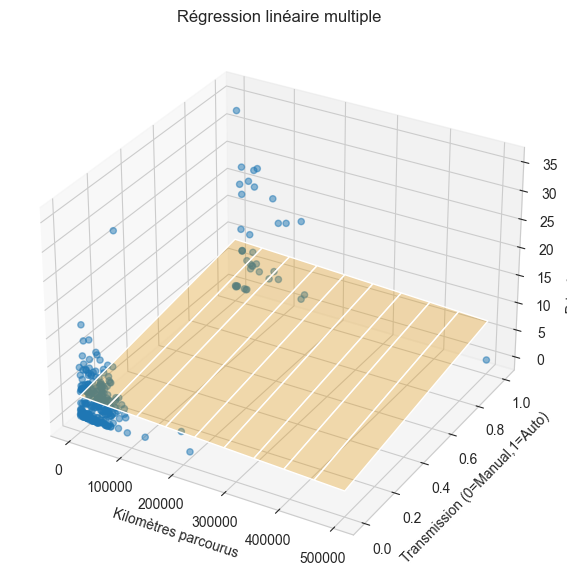

In [21]:
# Régression linéaire multiple (Kms_Driven + Transmission -> Selling_Price)

# Préparation des données
# Encodage de la variable catégorielle 'Transmission' en numérique
# Transmission prend probablement deux valeurs : "Manual" et "Automatic".
df_clean['Transmission_enc'] = df_clean['Transmission'].map({'Manual': 0, 'Automatic': 1})

# Variables explicatives et variable cible
features = ['Kms_Driven', 'Transmission_enc']
X_multi = df_clean[features].values
y_multi = df_clean['Selling_Price'].values

# Entraînement du modèle
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Affichage des coefficients
print("Coefficient de la régression multiple :")
for feat, coef in zip(features, model_multi.coef_):
    print(f" {feat} -> {coef:.6f}")
print(f"Intercept = {model_multi.intercept_:.4f}")
print(f"Score R² (entrainement) = {model_multi.score(X_multi, y_multi):.4f}")

# Quelques prédictions d'exemple
example = np.array([[50000, 0],  # 50k km, manuel
                    [50000, 1],  # 50k km, automatique
                    [100000, 1]])
print("\nPrédictions exemples (kms, transmission_enc) :")
print(model_multi.predict(example))

# Visualisation (scatter plot en 3D) pour voir le plan de régression
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean['Kms_Driven'], df_clean['Transmission_enc'], df_clean['Selling_Price'], alpha=0.5)
ax.set_xlabel('Kilomètres parcourus')
ax.set_ylabel('Transmission (0=Manual,1=Auto)')
ax.set_zlabel('Prix de vente (lakh)')
ax.set_title('Régression linéaire multiple')

# Plan de prédiction
kms_range = np.linspace(df_clean['Kms_Driven'].min(), df_clean['Kms_Driven'].max(), 10)
trans_range = np.array([0, 1])
K, T = np.meshgrid(kms_range, trans_range)
Z = model_multi.intercept_ + model_multi.coef_[0] * K + model_multi.coef_[1] * T
ax.plot_surface(K, T, Z, alpha=0.3, color='orange')
plt.show()


## Evaluation des modèles de régression linéaire


Évaluation de Régression univariée:
  MSE  = 23.3995
  RMSE = 4.8373
  MAE  = 3.1648
  R²   = 0.0549

Évaluation de Régression multivariée:
  MSE  = 21.7253
  RMSE = 4.6610
  MAE  = 3.3224
  R²   = 0.1226


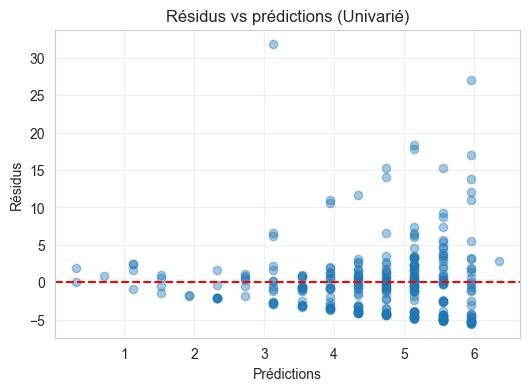

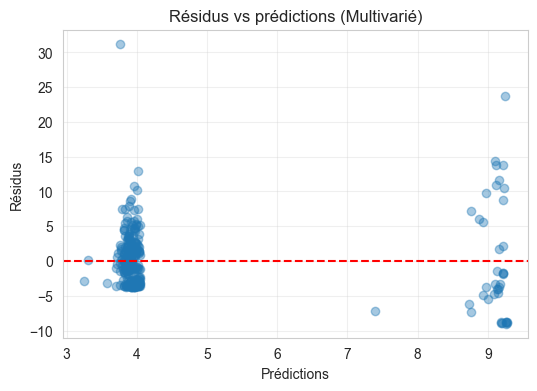

In [22]:
# Fonction utilitaire pour afficher les métriques
def evaluate_model(model, X, y, name="modèle"):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"\nÉvaluation de {name}:")
    print(f"  MSE  = {mse:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  MAE  = {mae:.4f}")
    print(f"  R²   = {r2:.4f}")
    return y_pred

# Évaluer modèle univarié (scikit-learn)
y_pred_uni = evaluate_model(model, X, y, name="Régression univariée")

# Évaluer modèle multivarié
y_pred_multi = evaluate_model(model_multi, X_multi, y_multi, name="Régression multivariée")

# Visualisation des résidus pour chaque modèle
for title, Xdata, y_true, y_pred in [
    ("Univarié", X, y, y_pred_uni),
    ("Multivarié", X_multi, y_multi, y_pred_multi)
]:
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.4)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Résidus vs prédictions ({title})")
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')
    plt.grid(alpha=0.3)
    plt.show()


## Conclusion des modèles

- **Une légère amélioration** est observée avec la régression multivariée : le R² augmente et le MSE/RMSE diminue par rapport au modèle univarié. L'ajout de la variable `Transmission` contribue modestement à l'explication du prix.

- Toutefois, les scores restent relativement faibles (R² < 0,2), ce qui signifie que ces deux caractéristiques n'expliquent qu'une petite portion de la variance du prix. D'autres facteurs (marque, modèle, puissance, année précise, etc.) sont nécessaires pour obtenir des prédictions plus fiables.

- Les graphiques de résidus montrent encore des structures et certaines hétéroscédasticités, suggérant que la relation n'est pas purement linéaire ou que des variables explicatives importantes manquent.

En résumé, ces modèles servent de point de départ pour estimer le prix, mais une modélisation plus riche ou l'emploi d'algorithmes plus complexes sera indispensable pour un usage prédictif robuste.